## COMP 562 Machine Learning Final Project

# Classifying News Articles as Fake/Real News and Performing Sentiment Analysis using an SVM Classifier with  Bag of Words Representation of Data 

### by Jacob Smith, Noah Van Hook, Gayathri Raghavendra, and Jacob Dallin

$$
\renewcommand{\xx}{\mathbf{x}}
\renewcommand{\yy}{\mathbf{y}}
\renewcommand{\zz}{\mathbf{z}}
\renewcommand{\vv}{\mathbf{v}}
\renewcommand{\bbeta}{\boldsymbol{\mathbf{\beta}}}
\renewcommand{\mmu}{\boldsymbol{\mathbf{\mu}}}
\renewcommand{\ssigma}{\boldsymbol{\mathbf{\sigma}}}
\renewcommand{\reals}{\mathbb{R}}
\renewcommand{\loglik}{\mathcal{LL}}
\renewcommand{\penloglik}{\mathcal{PLL}}
\renewcommand{\likelihood}{\mathcal{L}}
\renewcommand{\Data}{\textrm{Data}}
\renewcommand{\given}{ \big| }
\renewcommand{\MLE}{\textrm{MLE}}
\renewcommand{\EE}{\mathbb{E}}
\renewcommand{\KL}{\textrm{KL}}
\renewcommand{\Bound}{\mathcal{B}}
\renewcommand{\tth}{\textrm{th}}
\renewcommand{\Gaussian}[2]{\mathcal{N}\left(#1,#2\right)}
\renewcommand{\norm}[1]{\left\lVert#1\right\rVert}
\renewcommand{\ones}{\mathbf{1}}
\renewcommand{\diag}[1]{\textrm{diag}\left( #1 \right)}
\renewcommand{\sigmoid}[1]{\sigma\left(#1\right)}
\renewcommand{\myexp}[1]{\exp\left\{#1\right\}}
\renewcommand{\mylog}[1]{\log\left\{#1\right\}}
\renewcommand{\argmax}{\mathop{\textrm{argmax}}}
\renewcommand{\new}{\textrm{new}}
\renewcommand{\old}{\textrm{old}}
\renewcommand{\bb}{\mathbf{b}}
\renewcommand{\ba}{\mathbf{a}}
\renewcommand{\BB}{\mathbf{B}}
\renewcommand{\BA}{\mathbf{A}}
\renewcommand{\BC}{\mathbf{C}}
\renewcommand{\SSS}{\mathbf{S}}
\renewcommand{\tr}[1]{\textrm{tr}\left\{#1\right\}}
\renewcommand{\XX}{\mathbf{X}}
\renewcommand{\WW}{\mathbf{W}}
\renewcommand{\VV}{\mathbf{V}}
\renewcommand{\UU}{\mathbf{U}}
\renewcommand{\DD}{\mathbf{D}}
\renewcommand{\dd}{\mathbf{d}}
\renewcommand{\ZZ}{\mathbf{Z}}
\renewcommand{\CC}{\mathbf{C}}
$$

Bernoulli
$$
p(y=1|\theta) = \theta
$$

Sigmoid
$$
\theta = \sigma(\beta_0 + \xx^T\beta) 
$$

$$
p(y=1 \given \theta=\sigma(\beta_0 + \xx^T\beta) ) = \sigma(\beta_0 + \xx^T\beta) 
$$

Probability of a single sample is:
$$
p(y\given\xx,\beta_0,\beta) = \frac{1}{1 + \myexp{-y(\beta_0 + \xx^T\beta)}}
$$

Likelihood function is:
$$
\likelihood(\beta_0,\beta\given\yy,\xx) = \prod_i \frac{1}{1 + \myexp{-y_i(\beta_0 + \xx_i^T\beta)}}
$$

Log-likelihood function is:
$$
\loglik(\beta_0,\beta\given\yy,\xx) = -\sum_i \log\left\{1 + \myexp{-y_i(\beta_0 + \xx_i^T\beta)} \right\}
$$

## Fake News Classifier

In [51]:
from __future__ import print_function
import numpy as np
import pandas as pd
import string
from sklearn.model_selection import train_test_split

# we need to separate a portion of the data for train and test
fake=pd.read_csv('Fake.csv', sep=',',header=0)
true=pd.read_csv('True.csv', sep=',',header=0)

# print(fake_coded_headlines[0])

## Create Data Labels and Join Datasets

In [52]:
# Code the true/fake data
zeros = np.zeros((fake.shape[0], 1))
fake_coded_headlines = np.append(fake.values[:,0].reshape(fake.shape[0], 1), zeros, 1)

ones = np.ones((true.shape[0], 1))
true_coded_headlines = np.append(true.values[:,0].reshape(true.shape[0], 1), ones, 1)

# Join into one dataset
joined = np.append(fake_coded_headlines, true_coded_headlines, axis=0)

# split data into titles and labels
X = joined[:,0]
y = joined[:,1]
y = np.asarray(y)
y=y.astype('int')

print(X)

[' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing'
 ' Drunk Bragging Trump Staffer Started Russian Collusion Investigation'
 ' Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’'
 ... 'Minsk cultural hub becomes haven from authorities'
 'Vatican upbeat on possibility of Pope Francis visiting Russia'
 'Indonesia to buy $1.14 billion worth of Russian jets']


## Generate character frequency of titles

In [65]:
from collections import Counter

allheadlines = ''.join(X.copy())
allchars = Counter(allheadlines)
allchars = dict(allchars).keys()
print(allchars)

dict_keys([' ', 'D', 'o', 'n', 'a', 'l', 'd', 'T', 'r', 'u', 'm', 'p', 'S', 'e', 's', 'O', 't', 'E', 'b', 'i', 'g', 'N', 'w', 'Y', '’', 'v', 'M', ';', 'h', 'k', 'B', 'f', 'R', 'C', 'I', 'c', 'A', 'J', 'F', 'P', '‘', 'y', 'H', 'W', '(', 'G', ')', 'z', ',', 'L', 'U', ':', '-', '*', 'K', '—', '2', '0', '1', '8', '–', 'x', '.', 'V', 'X', 'Z', '5', '?', '7', '4', '3', 'j', 'Q', '6', '$', '!', '[', ']', '/', 'q', '+', 'í', '9', '%', '#', '“', '”', '\r', '\n', '&', '…', 'é', '™', '@', '\u202a', '\u200e', '\u202c', '\xa0', '_', '\u200b', '′', "'", '{', 'ñ', '}', '″', '€', '£', 'É', '¡', 'ë', '\ufeff', '\xad', '=', 'Ž', 'ž', 'ć', 'à', '"', 'á', '¿'])


In [66]:
cfreqs = [{}] * len(X)

for x in range(len(X)):
  cfreqs[x] = dict(Counter(X[x]))

def vectorizeByChar(str):
    output_vector = []
    for c in allchars:
        output_vector.append(str.count(c))
    return output_vector

vectorizedXByChar = X.copy()
for i in range(len(X)):
    vectorizedXByChar[i] = vectorizeByChar(X[i])

vectorizedXByChar = np.array(vectorizedXByChar[:].tolist())
print(vectorizedXByChar)


[[12  2  1 ...  0  0  0]
 [ 8  1  3 ...  0  0  0]
 [15  1  6 ...  0  0  0]
 ...
 [ 6  0  3 ...  0  0  0]
 [ 8  0  4 ...  0  0  0]
 [ 8  0  5 ...  0  0  0]]


In [67]:

#using random state for reproducible results
X_trainByChar, X_testByChar, y_train, y_test = train_test_split(vectorizedXByChar, y, test_size=0.3, random_state=200)
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.3, random_state=200)

print(X_trainByChar.shape)
print(X_testByChar.shape)

print(y_train.shape)
print(y_test.shape)

(31428, 121)
(13470, 121)
(31428,)
(13470,)


In [68]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
clf.fit(X_trainByChar, y_train)
clf.score(X_testByChar, y_test)

0.9727542687453601

In [70]:
from sklearn import svm

svmX = X_trainByChar
svmY = y_train
svmClassifier = svm.SVC()
svmClassifier.fit(svmX, svmY)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [71]:
svmClassifier.score(X_testByChar, y_test)

0.9916852264291017

In [73]:
predictions = svmClassifier.predict(X_testByChar)
labels = y_test
errors = np.where(np.logical_not(np.equal(predictions, labels)))

misclassified = X_test_raw[errors]
misclassified_labels = y_test[errors]

should_be_false = np.where(np.logical_not(misclassified_labels))
should_be_true = np.where(misclassified_labels)

In [74]:
print('headlines that were classified as fake, but are true')
print(misclassified[should_be_true])

print('headlines that were classified as true, but are fake')
print(misclassified[should_be_false])

headlines that were classified as fake, but are true
['Senate confirms new USAID administrator Mark Green'
 "POLITICS: Xi Jinping's compliant generation"
 'Top Democratic senator probes SWIFT, NY Fed about Bangladesh heist'
 'INTERNET: Living with the Great Firewall of China'
 'Senator McCain says Putin bigger threat than ISIS'
 'ADVISORY: Story on Kushner visiting Iraq withdrawn'
 'China reiterates calls for South Korea to remove THAAD'
 'HP CEO Whitman compares Trump to Hitler, Mussolini'
 'Honduran opposition candidate Nasralla says "I no longer have anything to do in politics" after U.S. recognition of Hernandez victory'
 'Trump weighs two more U.S. lawmakers for top Interior post: POLITICO'
 'Ex-NAACP chief Ben Jealous to run for Maryland governor'
 'Trump on Twitter (Feb 17) - Tom Price, Boeing, NSA'
 'UAW chief says Clinton told him she would renegotiate NAFTA'
 'Trump, Pence to meet with former BB&T CEO Allison, others on Monday'
 'British PM May meets Iraqi PM Abadi in Baghdad

SVM character analysis confusion matrix


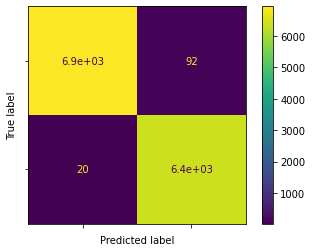

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = svmClassifier.predict(X_testByChar)
cm = confusion_matrix(y_test, y_pred)
print('SVM character analysis confusion matrix')
cm_display = ConfusionMatrixDisplay(cm, []).plot()

bernoulli character analysis confusion matrix


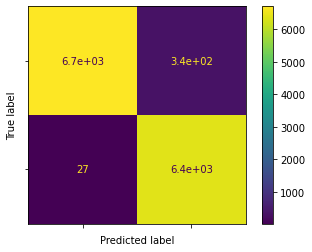

In [76]:
y_pred = clf.predict(X_testByChar)
cm = confusion_matrix(y_test, y_pred)
print('bernoulli character analysis confusion matrix')
cm_display = ConfusionMatrixDisplay(cm, []).plot()

## Generate Bag Of Words and Clean Titles

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
import re
from string import ascii_lowercase
import heapq
from nltk.corpus import stopwords
# Create wordbank for BOW

cleaned = X.copy()

# clean and tokenize each title
for i in range(len(cleaned)): 
    cleaned[i] = X[i].lower() 
    cleaned[i] = re.sub(r'\W', ' ', cleaned[i]) 
    cleaned[i] = re.sub(r'\s+', ' ', cleaned[i])
    cleaned[i] = cleaned[i].split()
        
# create bag of words corpus filtering out stopwords
myCorpus = {}
stopwords = set(stopwords.words('english'))
for title in cleaned: 
    for word in title:
        if word not in stopwords:
            if word not in myCorpus.keys(): 
                myCorpus[word] = 1
            else: 
                myCorpus[word] += 1 
          

# consider removing single letter words
for c in ascii_lowercase:
    myCorpus.pop(c, None)


# remove less common words
vocab = heapq.nlargest(1000, myCorpus, key=myCorpus.get)

print(vocab)

['trump', 'video', 'says', 'obama', 'hillary', 'house', 'watch', 'clinton', 'new', 'white', 'president', 'russia', 'bill', 'state', 'republican', 'north', 'election', 'news', 'court', 'korea', 'senate', 'black', 'media', 'donald', 'breaking', 'vote', 'calls', 'china', 'anti', 'gop', 'police', 'tax', 'republicans', 'campaign', 'one', 'america', 'may', 'muslim', 'deal', 'iran', 'gets', 'russian', 'democrats', 'us', 'tweets', 'government', 'party', 'fbi', 'eu', 'people', 'cnn', 'back', 'attack', 'syria', 'former', 'war', 'first', 'law', 'leader', 'top', 'senator', 'talks', 'speech', 'twitter', 'plan', 'chief', 'tells', 'congress', 'security', 'democrat', 'minister', 'man', 'fox', 'make', 'would', 'ban', 'right', 'pm', 'gun', 'racist', 'american', 'south', 'could', 'judge', 'get', 'sanders', 'governor', 'women', 'two', 'brexit', 'official', 'makes', 'liberal', 'military', 'million', 'say', 'probe', 'fake', 'cruz', 'putin', 'year', 'americans', 'report', 'shows', 'factbox', 'foreign', 'nucl

## Vectorize Data

In [18]:
# vectorize the titles
def vectorize(title):
    output_vector = []
    for word in vocab:
        output_vector.append(title.count(word))
    return output_vector

vectorizedX = cleaned
for i in range(len(cleaned)):
    vectorizedX[i] = vectorize(cleaned[i])

X = np.array(vectorizedX[:].tolist())
print(X)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Create Train and Test Sets

In [19]:

#using random state for reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

print(X_train.shape)

(31428, 1000)
(13470, 1000)
(31428,)
(13470,)
(31428, 1000)


## Create a Bernouilli Naive Bayes and Score It

In [20]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9089086859688196

## Confusion Matrix

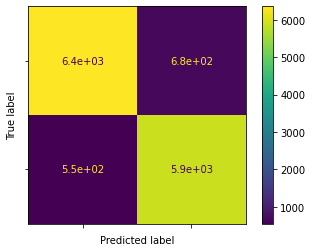

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm, []).plot()

In [ ]:
from sklearn import svm

svmX = X_train
svmY = y_train
svmClassifier = svm.SVC()
svmClassifier.fit(svmX, svmY)

SVC()

In [ ]:
svmClassifier.score(X_test, y_test)

0.6181143281365998

## Adding In Sentiment Analysis
### Using vaderSentiment and textblob Packages

In [ ]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 2.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -U textblob

     |████████████████████████████████| 636 kB 2.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from __future__ import print_function
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd
from textblob import TextBlob

analyzer = SentimentIntensityAnalyzer()

sentiment_subjectivity = np.empty([X.shape[0],5])

In [ ]:
for i in range(len(sentiment_subjectivity)):
    vs = analyzer.polarity_scores(X[i])
    keys, values = zip(*vs.items())
    sentiment_subjectivity[i][0] = values[0]
    sentiment_subjectivity[i][1] = values[1]
    sentiment_subjectivity[i][2] = values[2]
    sentiment_subjectivity[i][3] = values[3]
    sentiment_subjectivity[i][4]=TextBlob(X[i]).sentiment.subjectivity

In [ ]:
X_train_sent, X_test_sent, y_train_sent, y_test_sent = train_test_split(sentiment_subjectivity, y, test_size=0.3, random_state=200)

In [ ]:
from sklearn.naive_bayes import BernoulliNB

senti = BernoulliNB()
senti.fit(X_train_sent, y_train_sent)
senti.score(X_test_sent, y_test_sent)

0.6350408314773571

In [ ]:
from sklearn import svm

svmClassifier_senti = svm.SVC()
svmClassifier_senti.fit(X_train_sent, y_train_sent)
svmClassifier_senti.score(X_test_sent, y_test_sent)

0.7386785449146251